In [100]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import allel
import seaborn as sns
import allel
import os
import pickle 

import dask.dataframe as dd

In [69]:
dict_blocks = '/home/tbellagio/HapFM/blocks_snpsid_dict.pkl'

path = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/idea_fromind_to_pop/allele_assoc_runs'

path_bslmm = path + '/bslmm'

In [70]:
with open(dict_blocks, 'rb') as file:
    dict_blocks = pickle.load(file)

In [71]:
dict_blocks_inv = {}

# Iterate through the original dictionary
for key, values in dict_blocks.items():
    for value in values:
        dict_blocks_inv[value] = key

In [106]:
len(dict_blocks)

16917

In [84]:
biovars = [i for i in os.listdir(path_bslmm) if 'bio' in i]

In [92]:
for biovar in biovars:

    significant_gammas = pd.read_csv(path_bslmm + f'/{biovar}/output/significant_gammas.csv')
    
    params = pd.read_csv(path_bslmm + f'/{biovar}/output/{biovar}.param.txt', sep = '\t')
    
    significant_gammas.columns = ['significant']
    
    params = params.merge(significant_gammas, how = 'left', left_on = 'gamma', right_on = 'significant')
    
    params['significant'] = params['significant'].notna()
    
    params['blocks'] = params['rs'].map(dict_blocks_inv)
    
    params = params[['rs','gamma', 'beta', 'significant', 'blocks']]
    params.to_csv(path_bslmm + f'/{biovar}/output/results_bslmm.csv',index=None)

/tmp/ipykernel_3989128/3453832836.py:9: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  params = params.merge(significant_gammas, how = 'left', left_on = 'gamma', right_on = 'significant')
/tmp/ipykernel_3989128/3453832836.py:9: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  params = params.merge(significant_gammas, how = 'left', left_on = 'gamma', right_on = 'significant')
/tmp/ipykernel_3989128/3453832836.py:9: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  params = params.merge(significant_gammas, how = 'left', left_on = 'gamma', right_on = 'significant')


In [93]:
pd.read_csv(path_bslmm + f'/{biovar}/output/results_bslmm.csv')

,rs,gamma,beta,significant,blocks
0,1_346,0.0,0.0,False,1_0
1,1_353,0.0,0.0,False,1_0
2,1_363,0.0,0.0,False,1_0
3,1_425,0.0,0.0,False,1_0
4,1_471,0.0,0.0,False,1_0
...,...,...,...,...,...
1091488,5_26974820,0.0,0.0,False,5_3110
1091489,5_26975046,0.0,0.0,False,5_3110
1091490,5_26975078,0.0,0.0,False,5_3110
1091491,5_26975272,0.0,0.0,False,5_3110


In [96]:
biovar = 'bio1'

In [97]:
pd.read_csv(path_bslmm + f'/{biovar}/output/significant_gammas.csv')

,significant_gammas
0,0.99441
1,0.88199


/tmp/ipykernel_3989128/1492046472.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['gamma'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


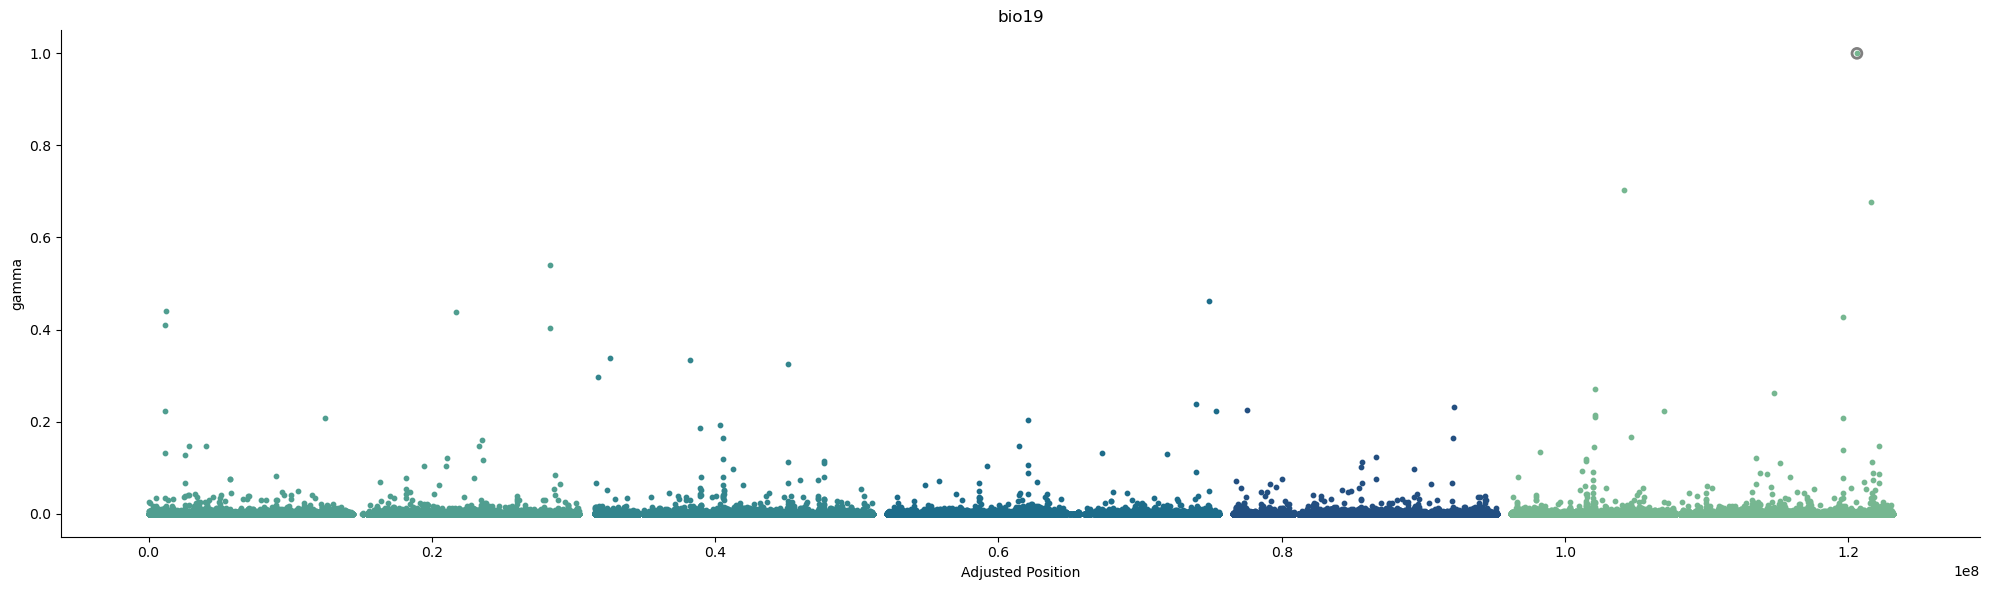

/tmp/ipykernel_3989128/1492046472.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['gamma'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


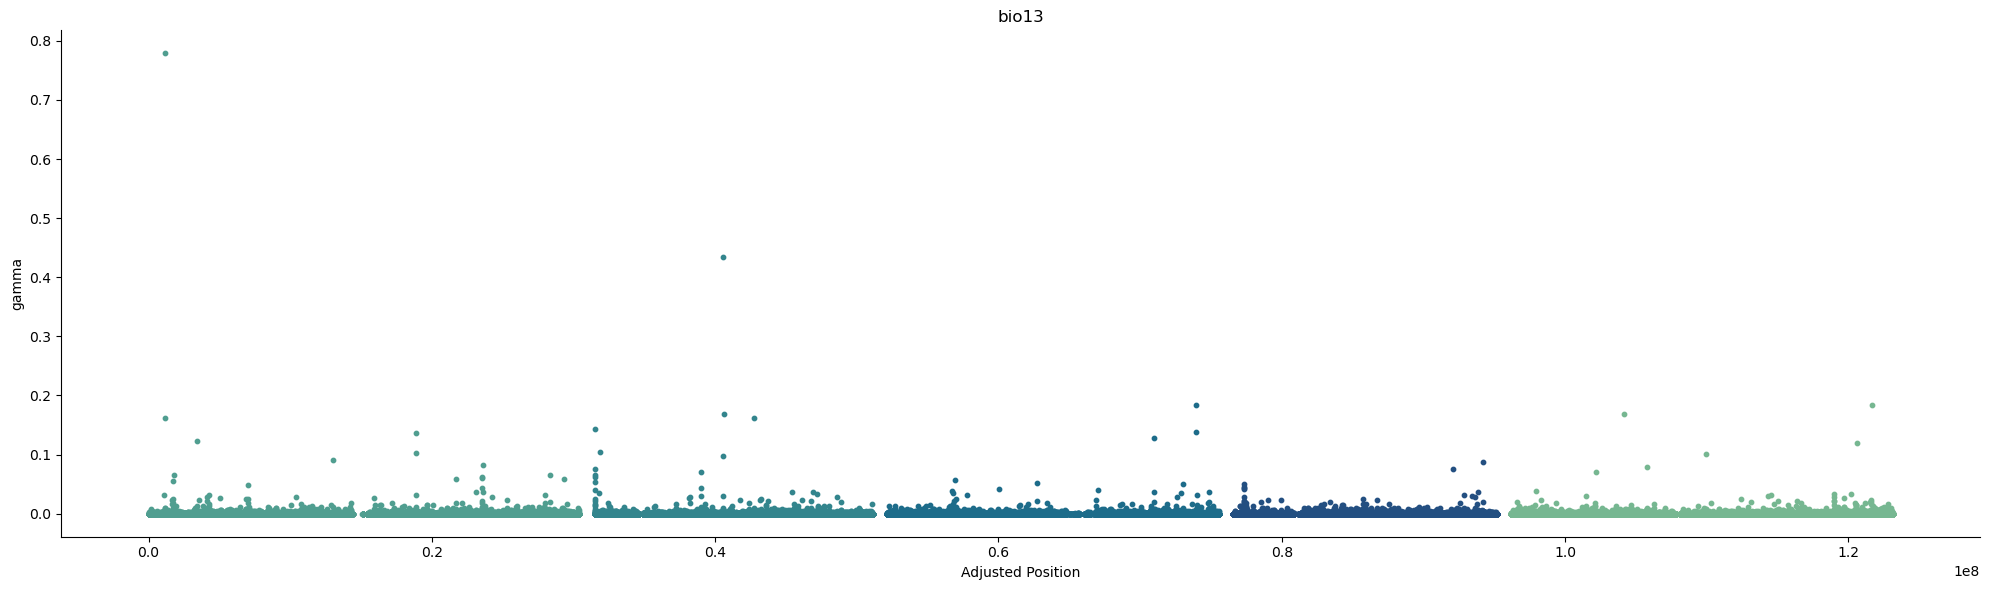

/tmp/ipykernel_3989128/1492046472.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['gamma'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


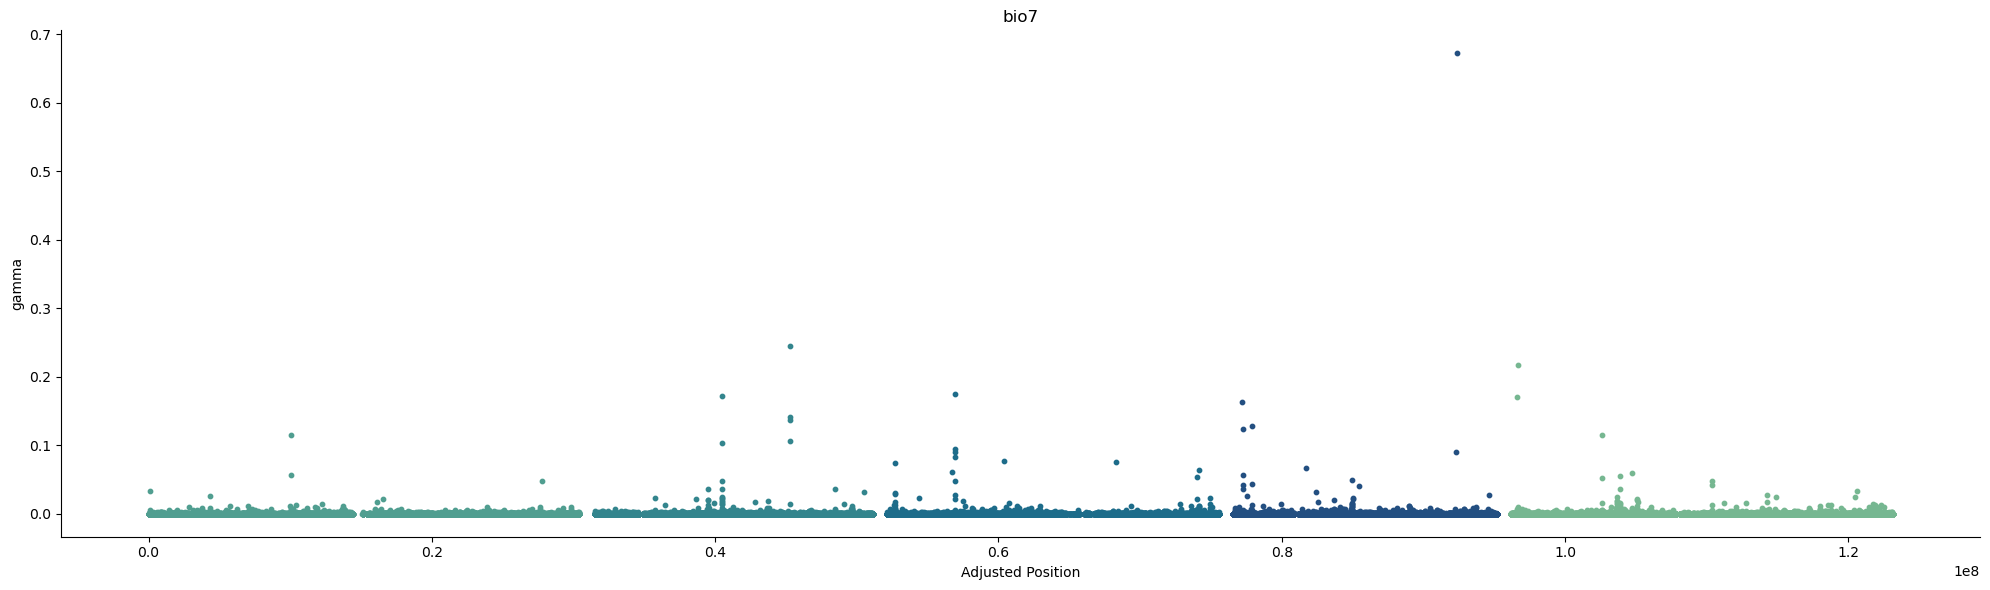

/tmp/ipykernel_3989128/1492046472.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['gamma'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


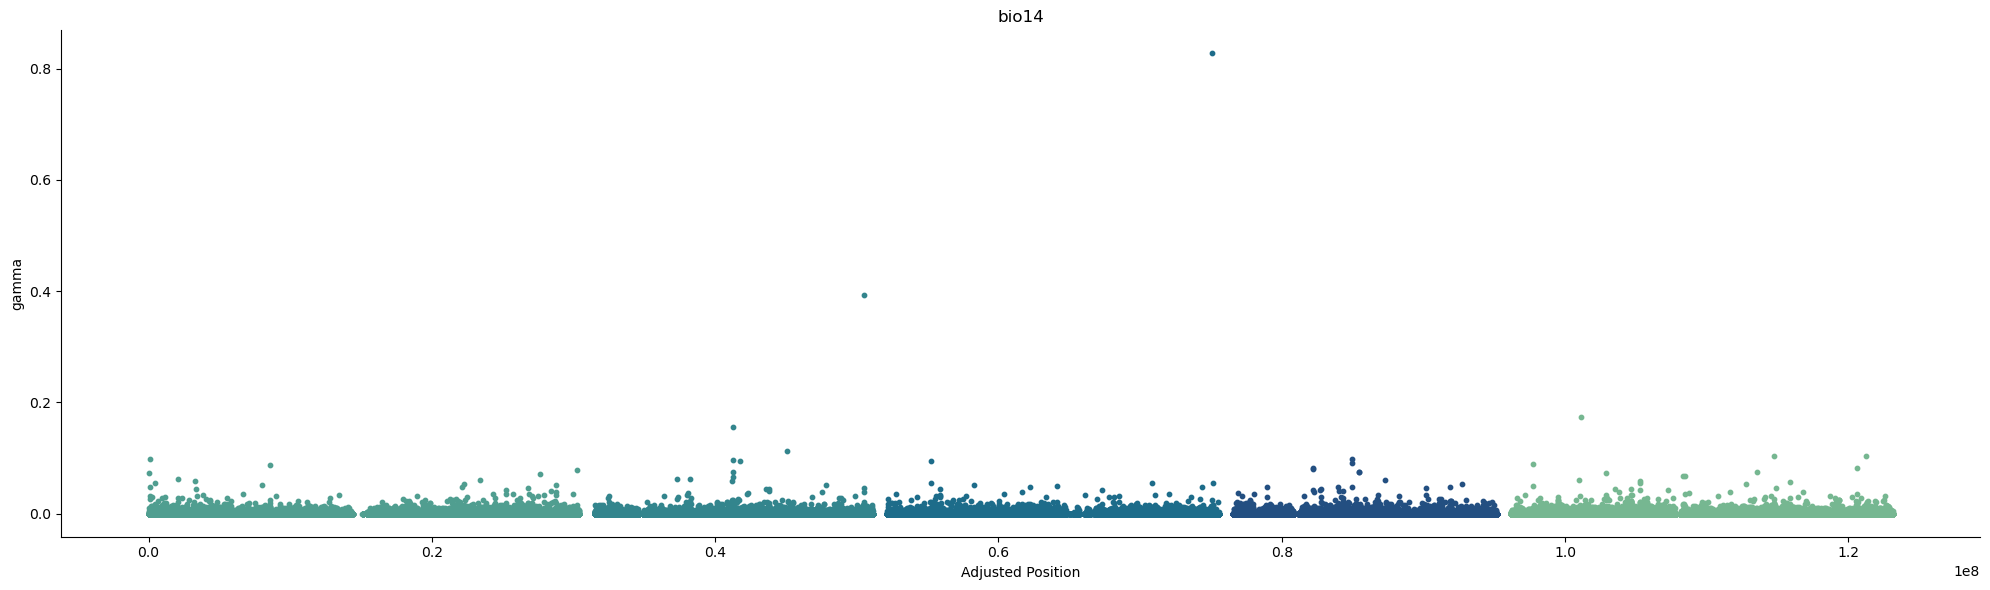

/tmp/ipykernel_3989128/1492046472.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['gamma'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


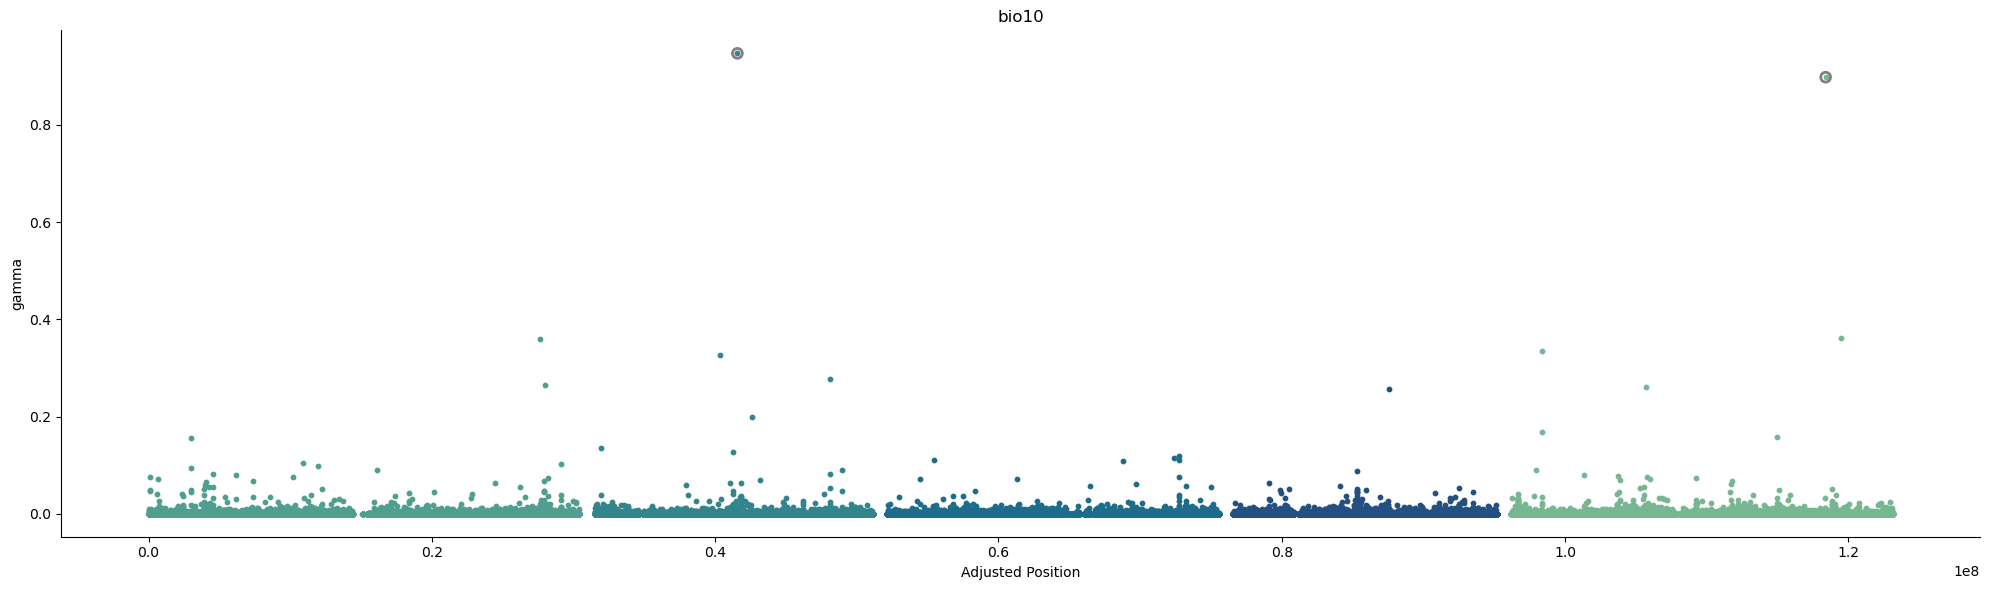

/tmp/ipykernel_3989128/1492046472.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['gamma'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


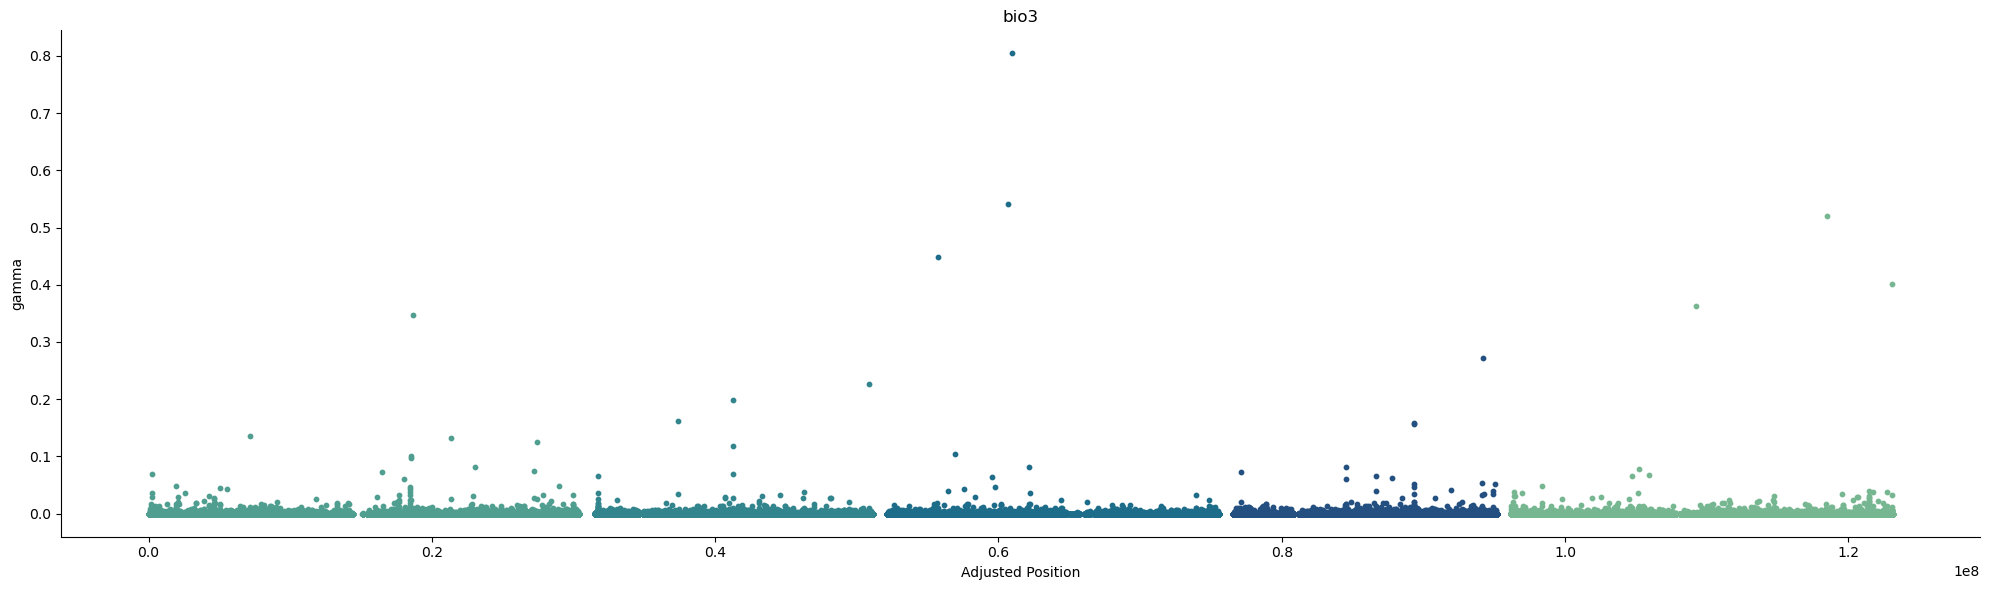

/tmp/ipykernel_3989128/1492046472.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['gamma'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


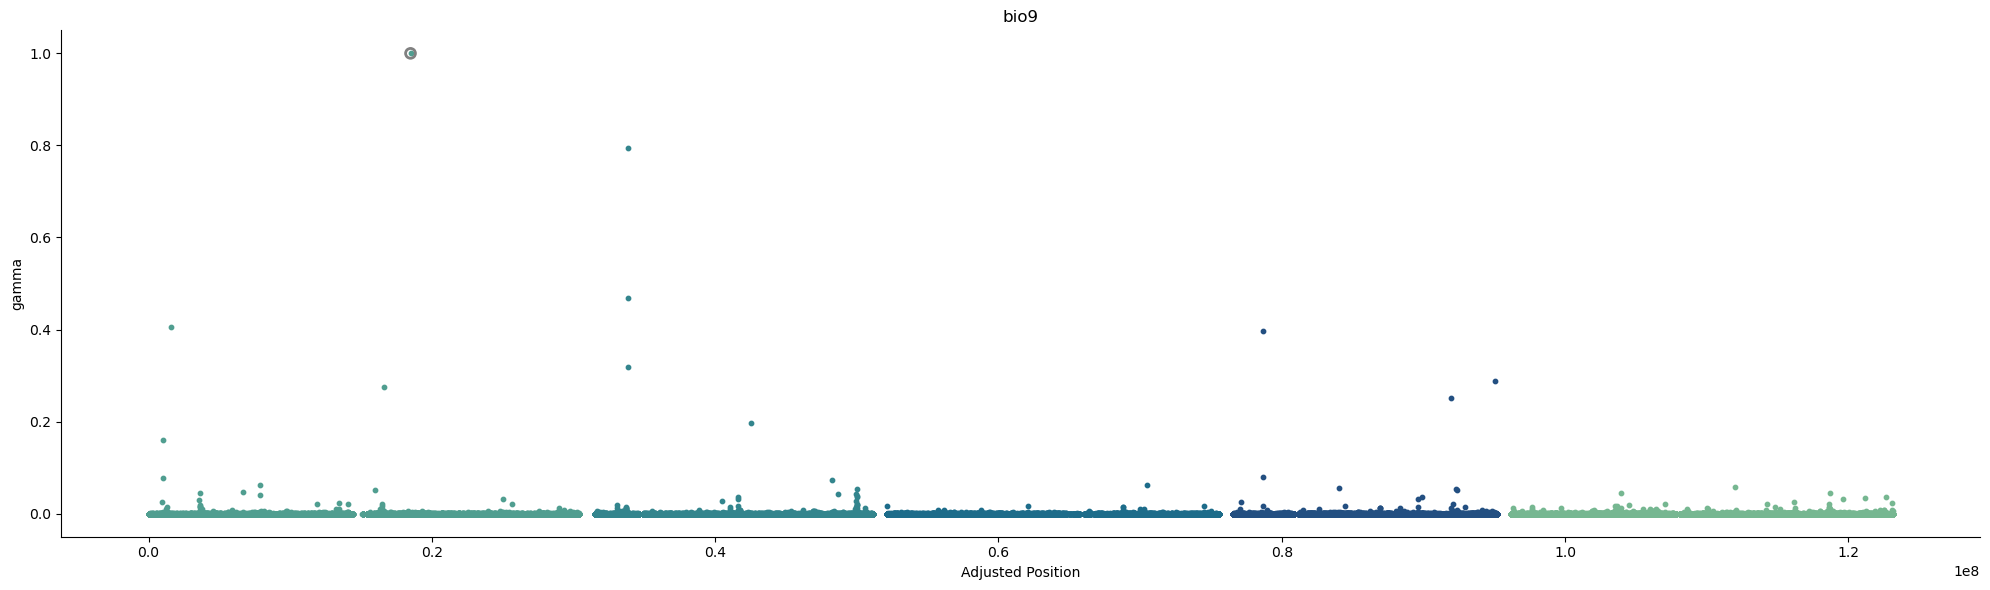

/tmp/ipykernel_3989128/1492046472.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['gamma'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


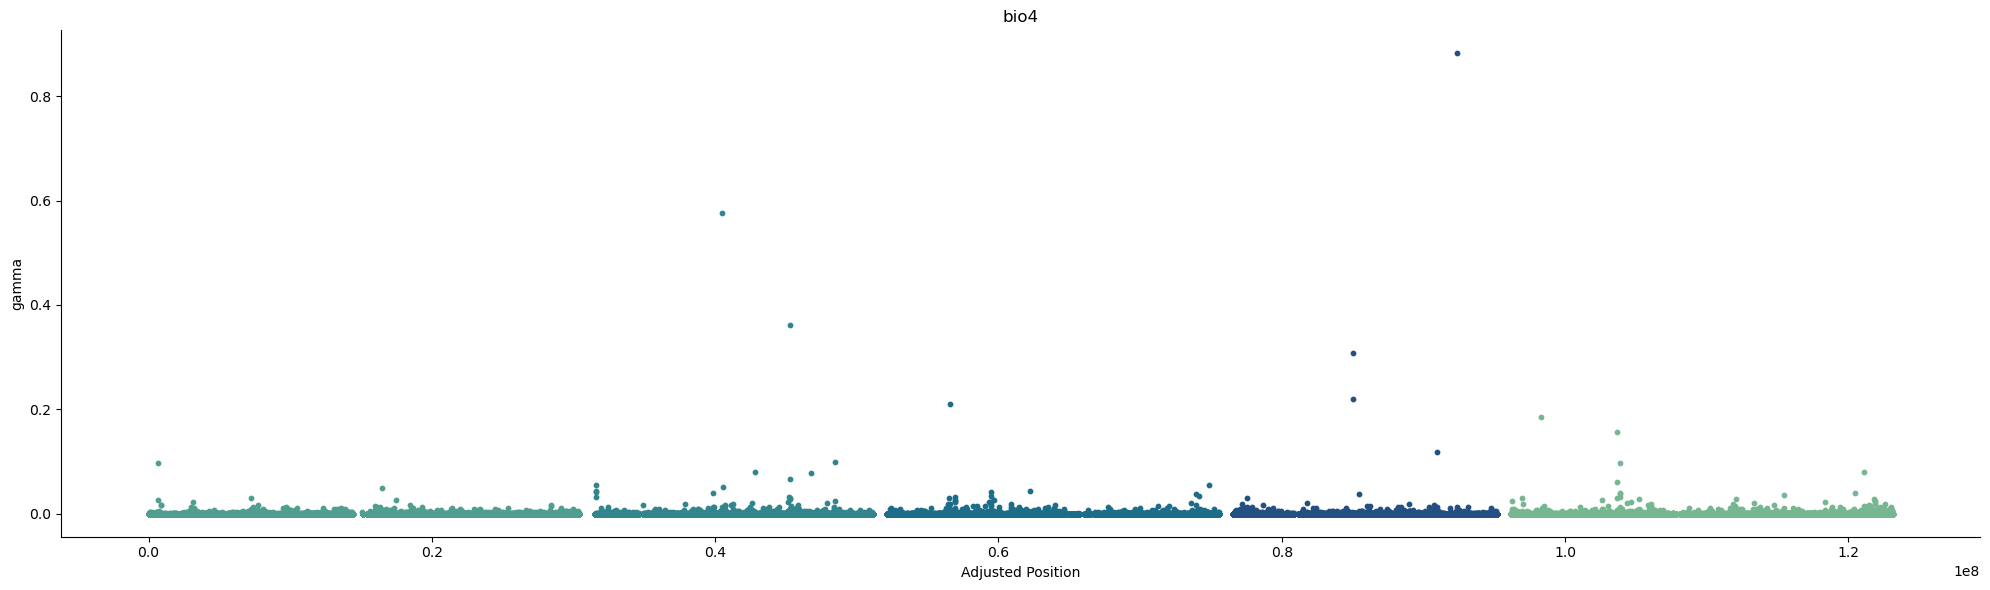

/tmp/ipykernel_3989128/1492046472.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['gamma'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


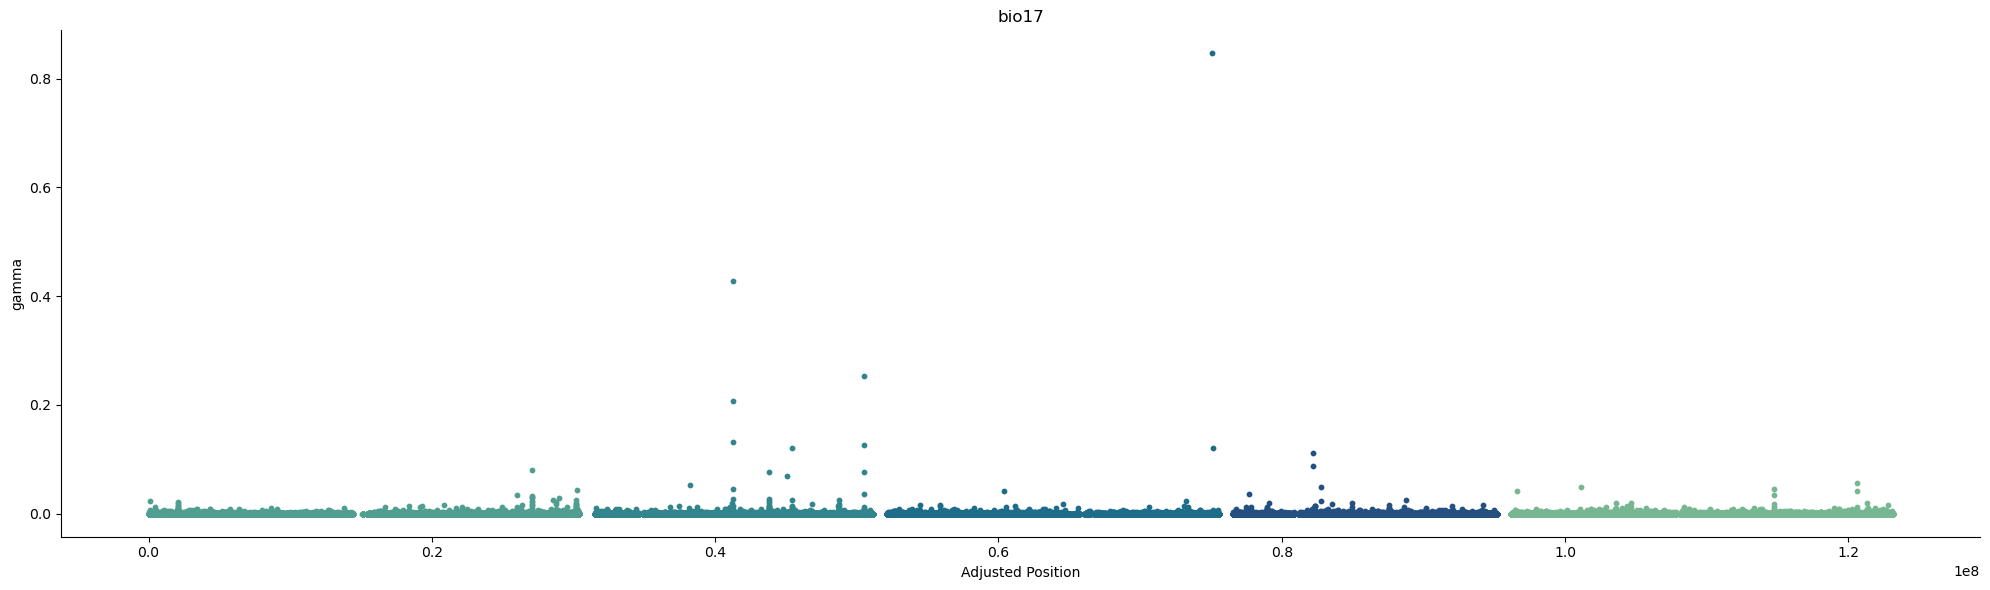

/tmp/ipykernel_3989128/1492046472.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['gamma'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


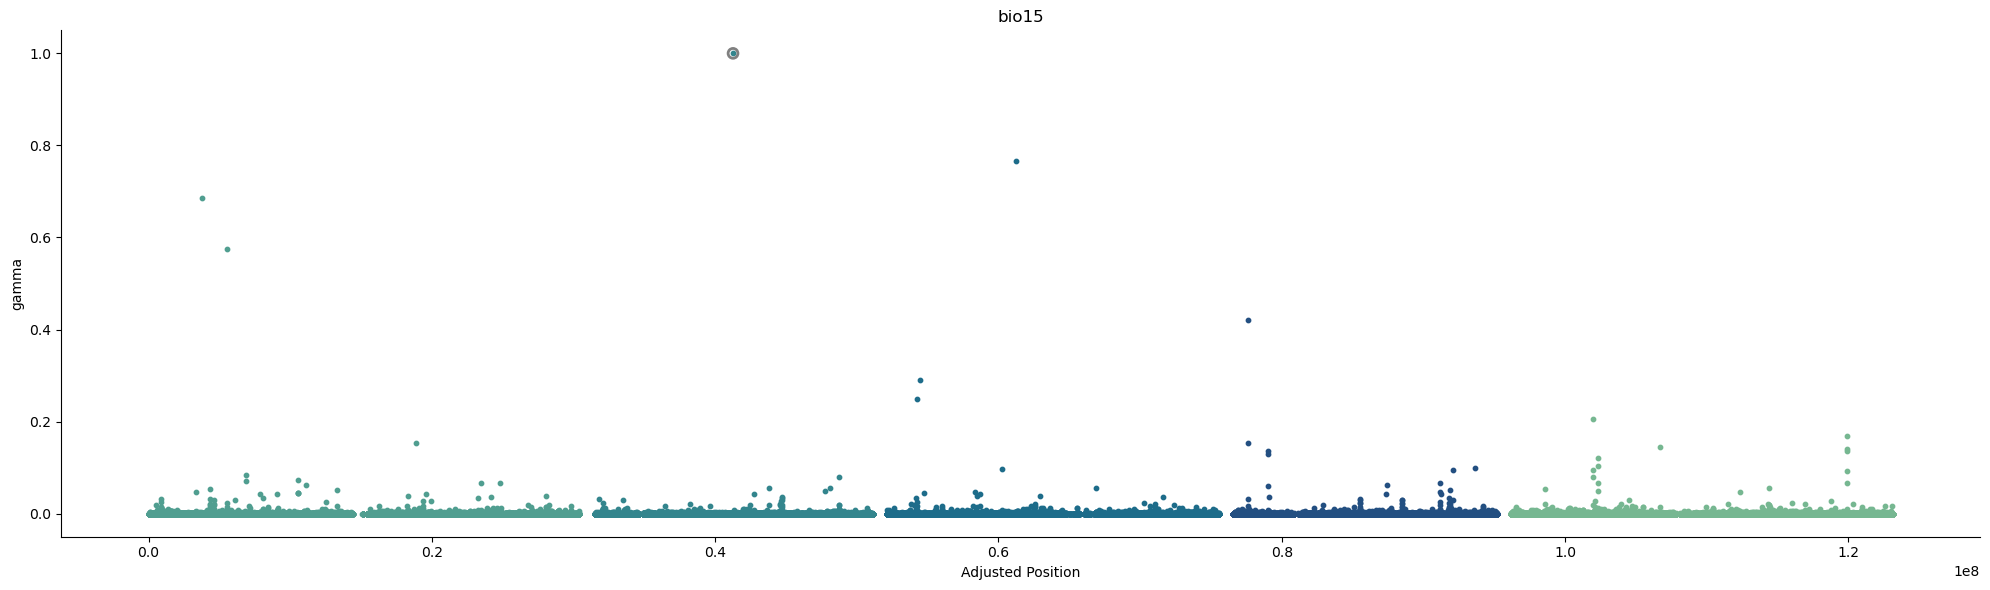

/tmp/ipykernel_3989128/1492046472.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['gamma'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


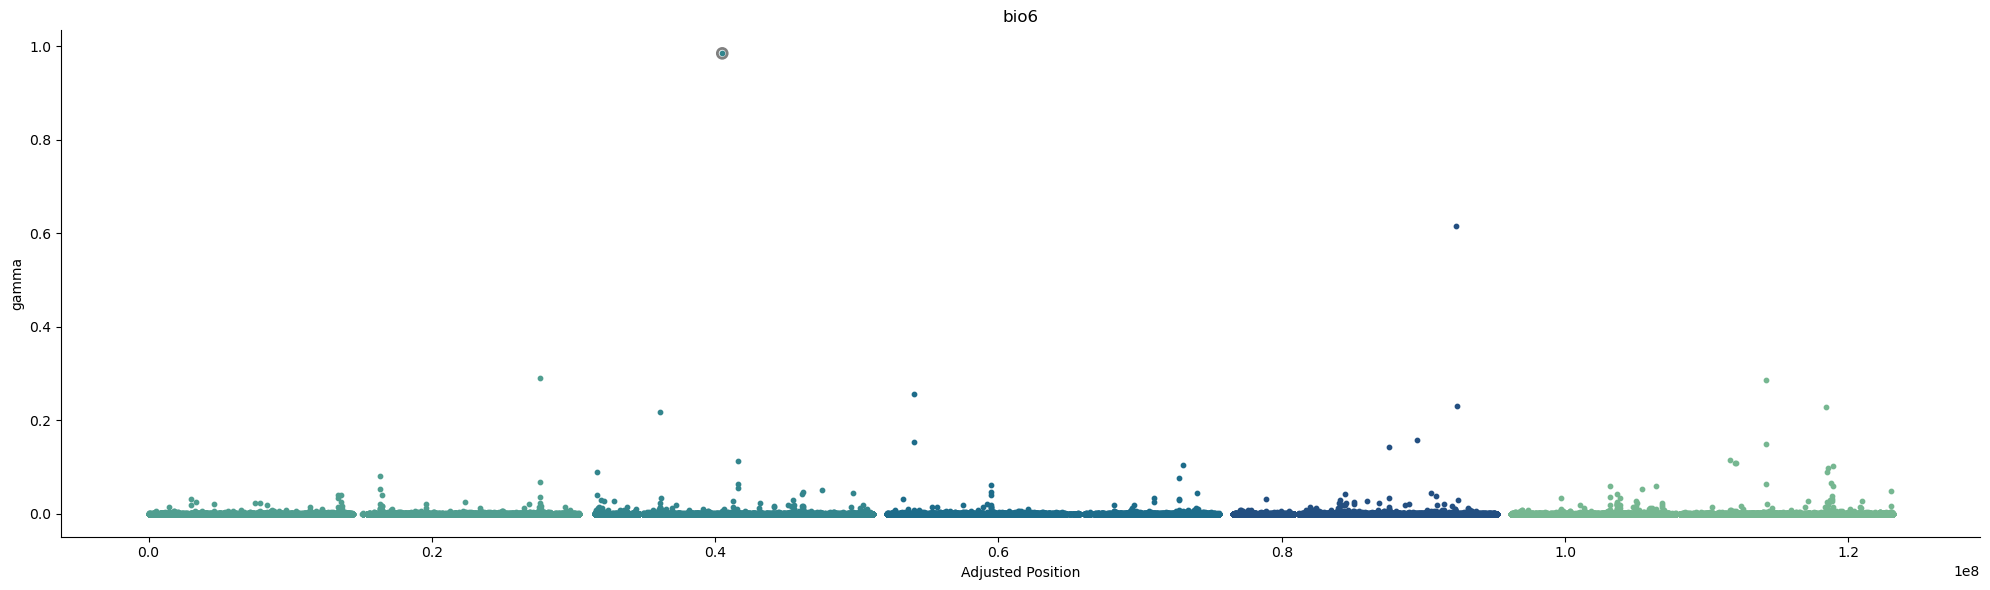

/tmp/ipykernel_3989128/1492046472.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['gamma'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


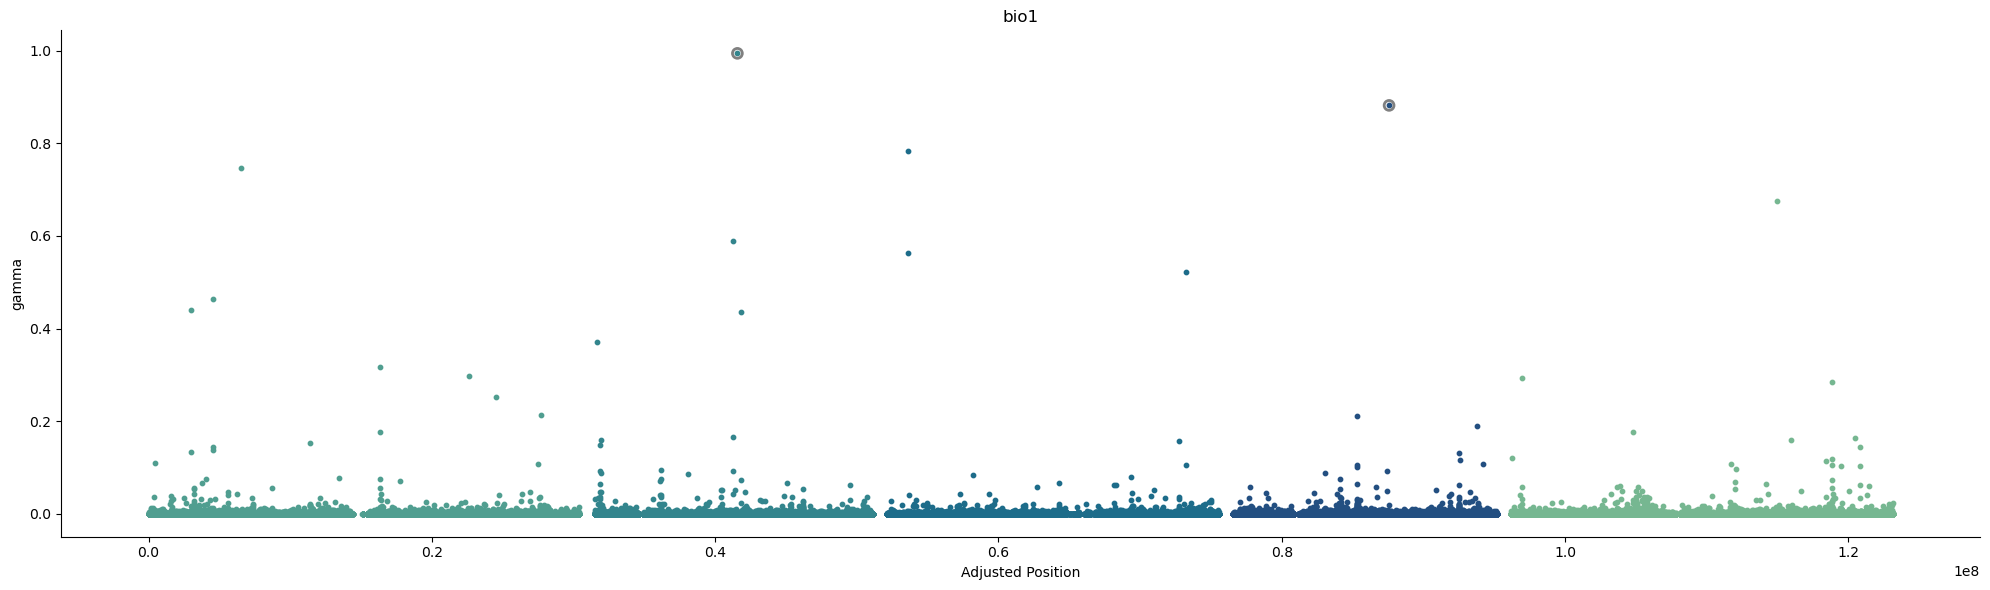

/tmp/ipykernel_3989128/1492046472.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['gamma'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


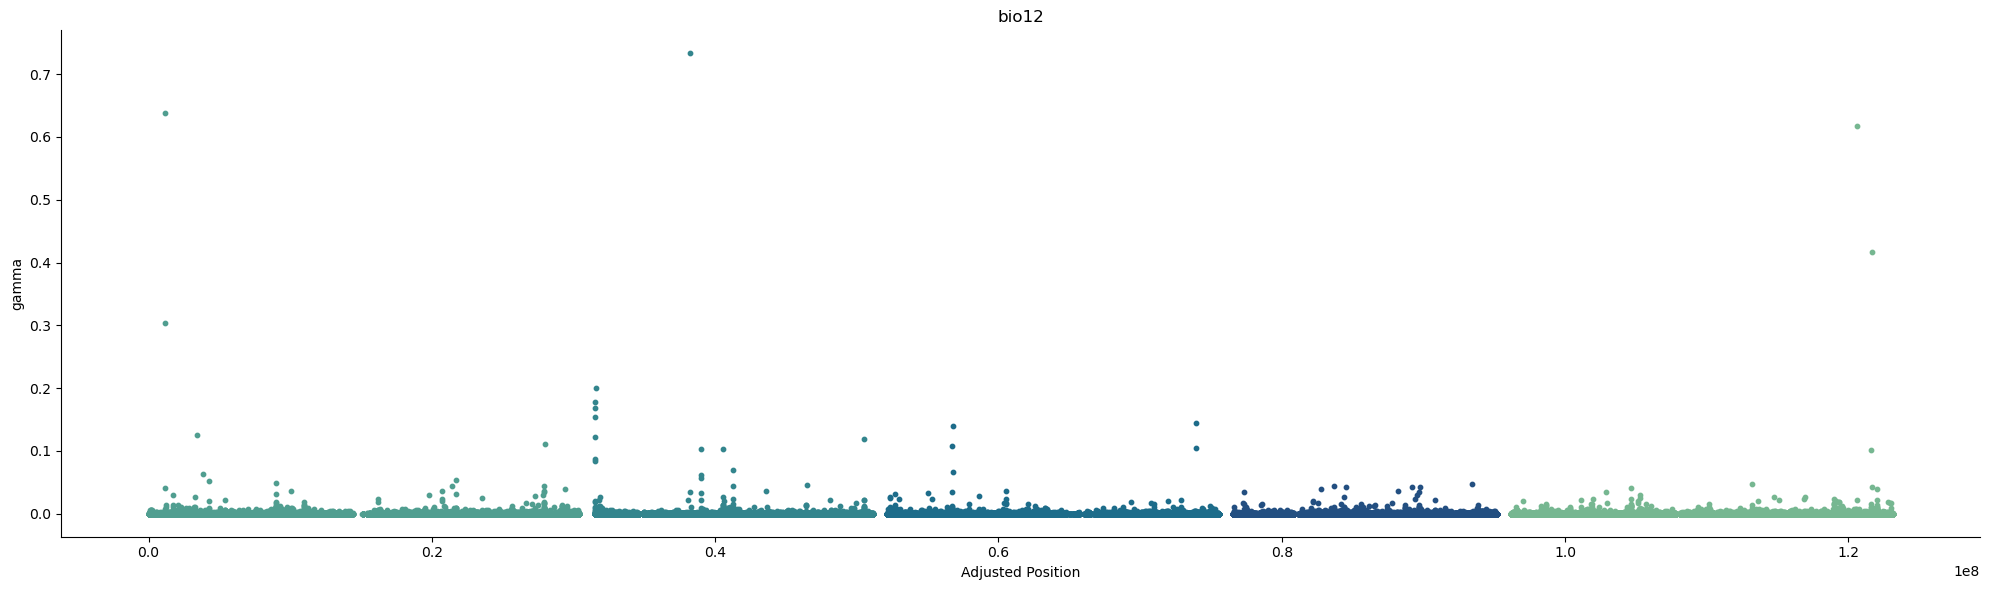

/tmp/ipykernel_3989128/1492046472.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['gamma'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


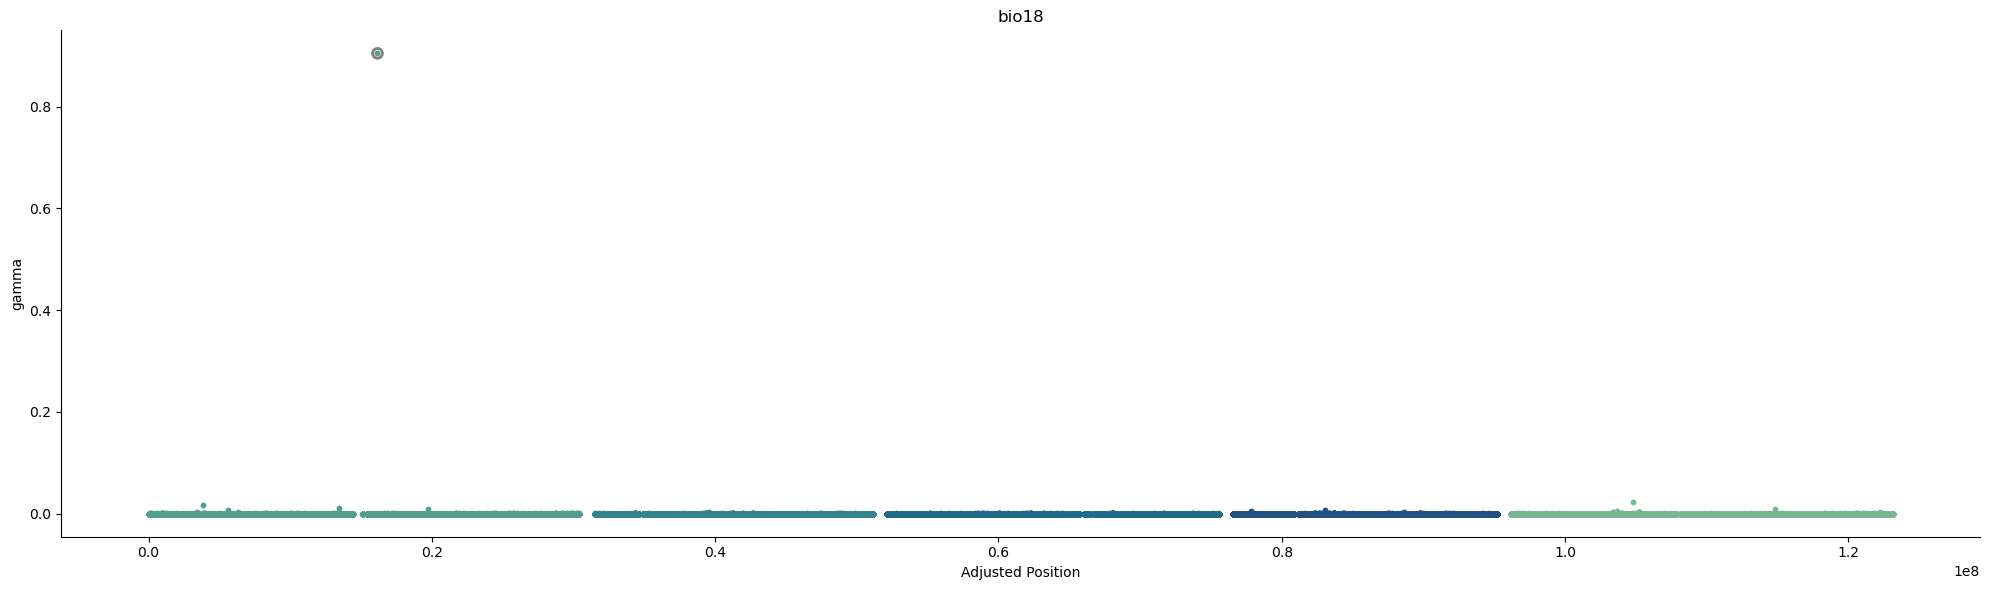

/tmp/ipykernel_3989128/1492046472.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['gamma'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


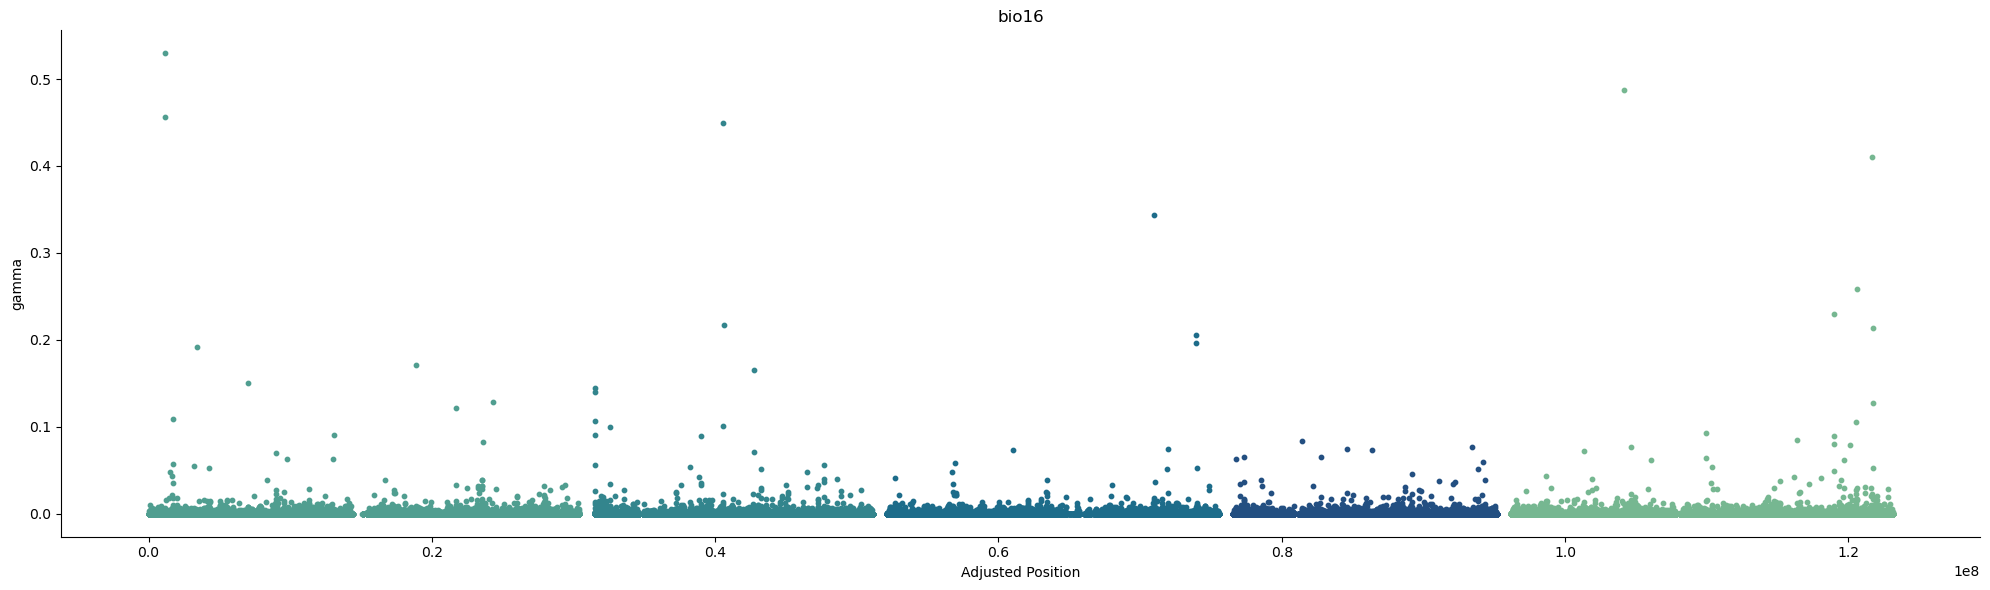

/tmp/ipykernel_3989128/1492046472.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['gamma'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


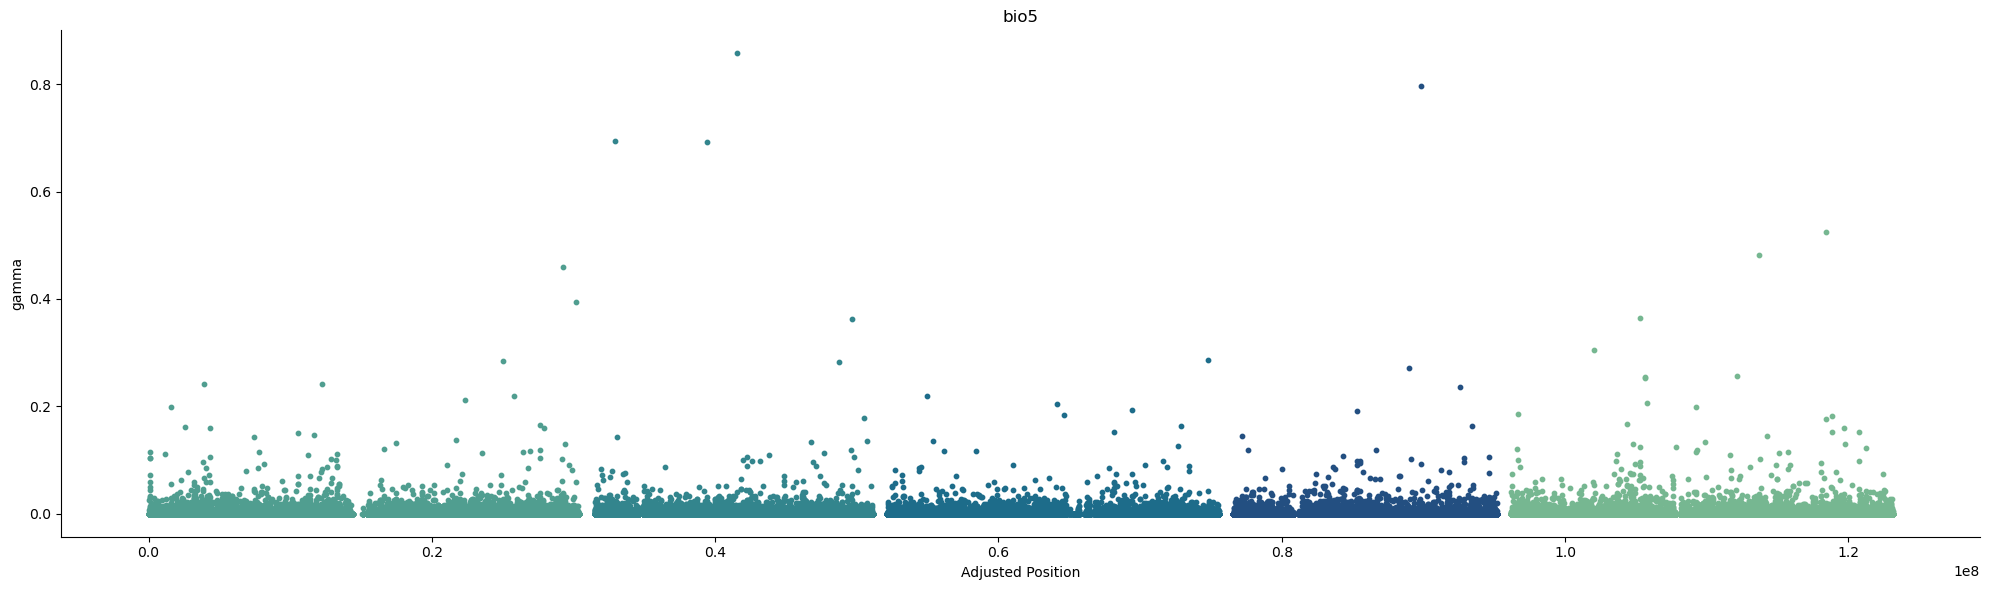

/tmp/ipykernel_3989128/1492046472.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['gamma'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


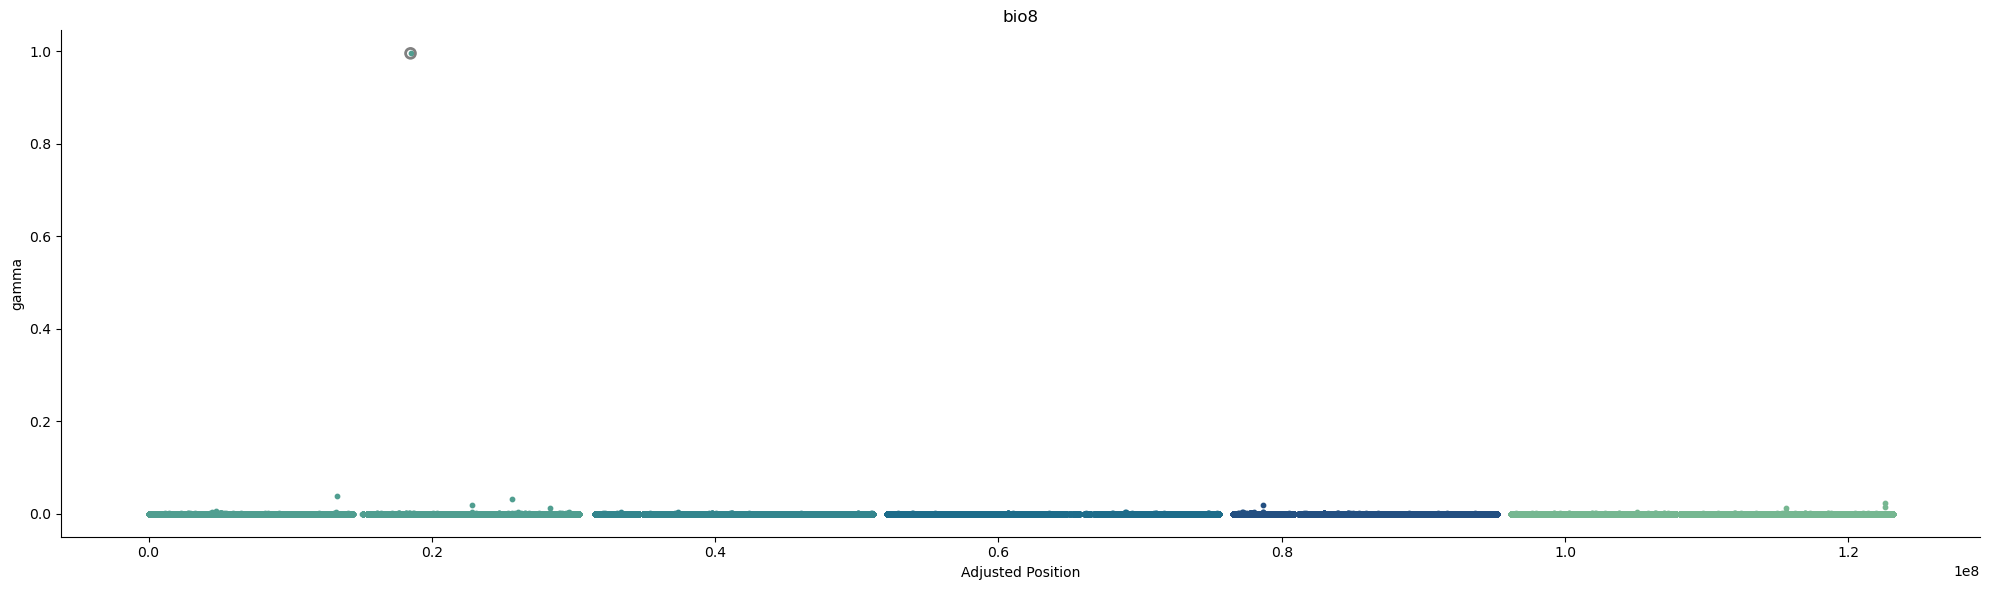

/tmp/ipykernel_3989128/1492046472.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['gamma'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


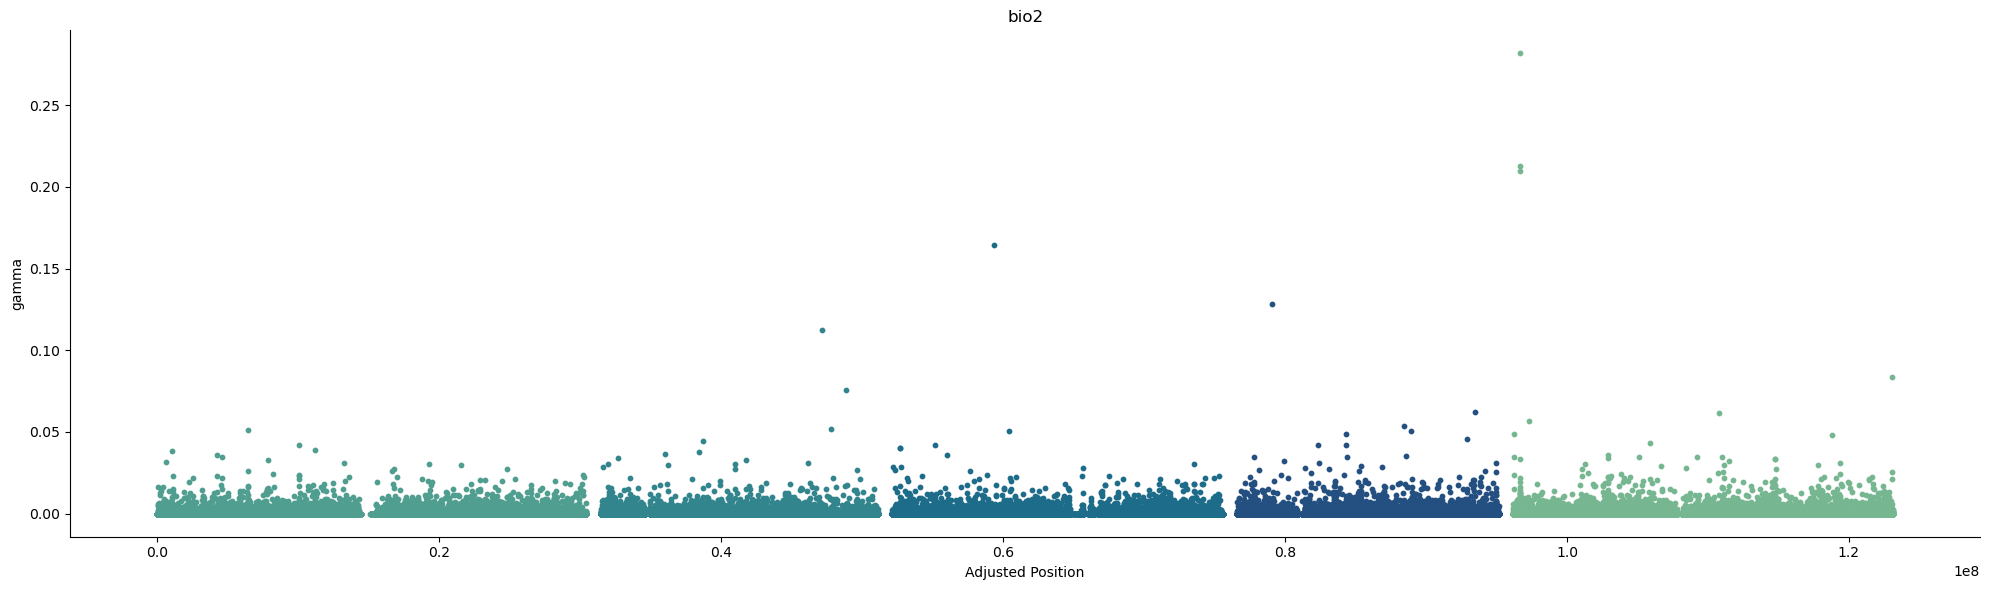

/tmp/ipykernel_3989128/1492046472.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['gamma'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


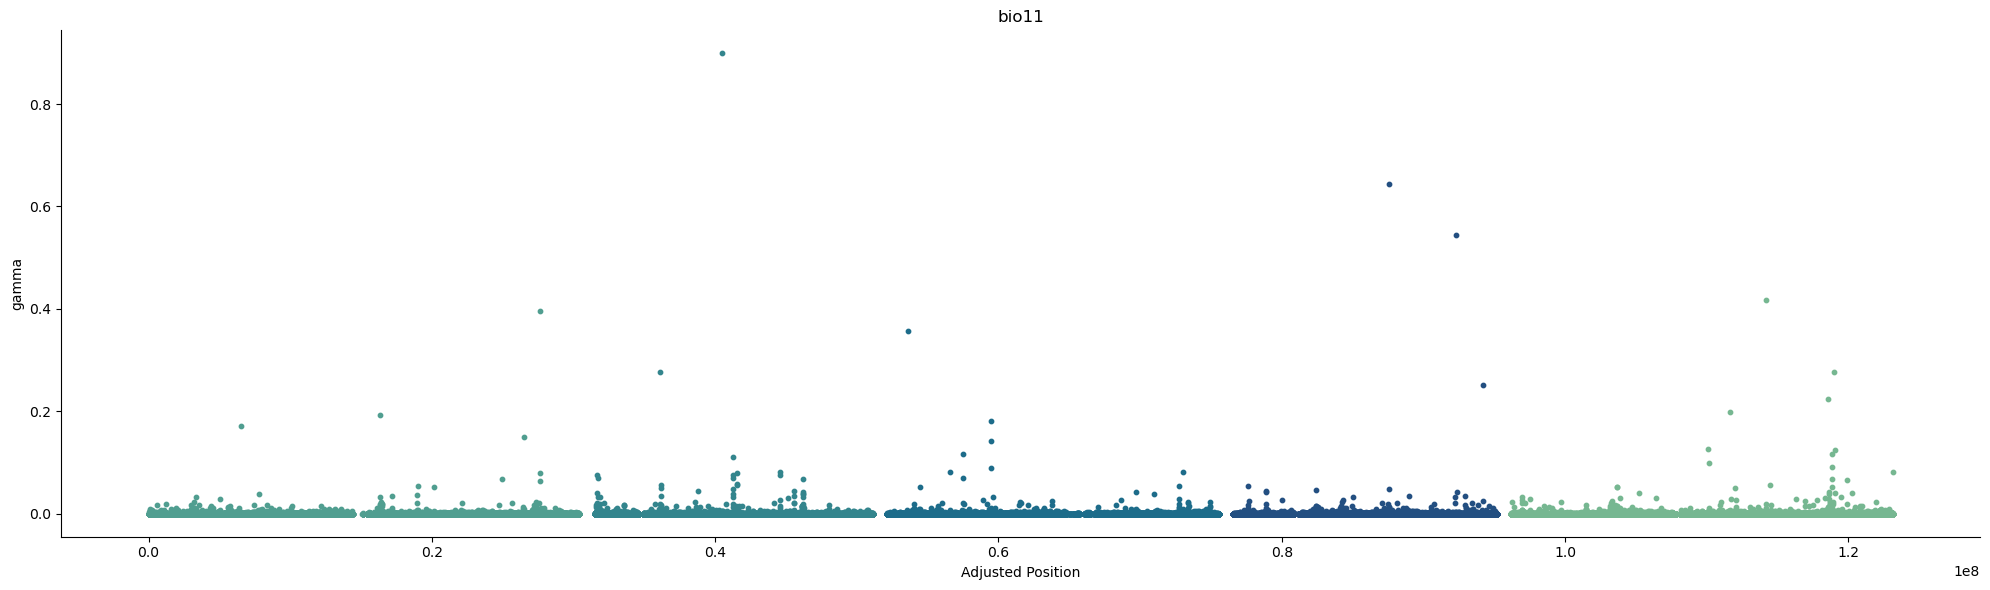

In [104]:
for biovar in biovars:
    
    clump= pd.read_csv(f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full/clumping/output/output_clumping_{biovar}.clumped', sep='\s+')
    
    pvalues_file = path_bslmm + f'/{biovar}/output/results_bslmm.csv'
    
    pvalues = dd.read_csv(pvalues_file)
    pvalues = pvalues.compute()
    
    pvalues.columns = ['rs','gamma', 'beta', 'significant', 'blocks']
    
    #sm.qqplot(pvalues['pvalue'], line ='45') 
    #py.show() 
    
    df = pvalues.copy()
    
    colors = sns.color_palette("crest", n_colors = 5)
    
    # Parsing chromosome number and position
    df['chromosome'] = df['rs'].str.split('_').str[0].astype(int)
    df['position'] = df['rs'].str.split('_').str[1].astype(int)
    df['gamma'] = df['gamma']
    
    # Calculate the offset for each chromosome to prevent overlap
    chromosome_offsets = {}
    offset = 0
    for chrom in sorted(df['chromosome'].unique()):
        chromosome_offsets[chrom] = offset
        max_position = df[df['chromosome'] == chrom]['position'].max()
        offset += max_position + 1000000  # Adding 1 million as a buffer between chromosomes
    
    # Apply offsets to positions
    df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)
    
    # Creating the Manhattan plot
    plt.figure(figsize=(20, 6))
    
    for chrom in sorted(df['chromosome'].unique()):
        subset = df[df['chromosome'] == chrom]
        plt.scatter(subset['adjusted_position'], subset['gamma'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)
    
    
    # Highlight clumped SNPs
    clumped_subset = df[df['significant'] == True]
    plt.scatter(clumped_subset['adjusted_position'], clumped_subset['gamma'], s=50, facecolors='none', edgecolors='grey', linewidths=2, label='Clumped SNPs')
    
    # Aesthetics
    plt.xlabel('Adjusted Position')
    plt.ylabel('gamma')
    #plt.title('Manhattan Plot')
    #plt.grid(axis='y')
    #plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
    ax = plt.gca()  # Get current axes
    ax.spines['top'].set_visible(False)  # Remove the top spine
    ax.spines['right'].set_visible(False)
    # Threshold line (optional)
    #threshold = -np.log10(threshold_value)
    #plt.axhline(y=threshold, color='grey', linestyle='dashed')
    plt.title(f'{biovar}')  # Set the title

    # Show the plot
    plt.tight_layout()

    plt.savefig(path_bslmm + f'/{biovar}/output/manhattan.png')
    plt.show()